In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


from wordcloud import WordCloud, STOPWORDS

import string
from matplotlib import style

In [78]:
#reading in 2020 tweets for nuclear energy with labels attached
df = pd.read_csv('tweets_2020_labeled.csv',index_col=0)

In [79]:
df.head(100)

,username,tweet,hashtags,label,labeled_tweet
0,patriot_1952,The Trump administration is rescinding an Obam...,[],"{'neg': 0.081, 'neu': 0.769, 'pos': 0.149, 'co...",neu
1,realnathancain,Support #Nuclear Energy ⚛️,['#nuclear'],"{'neg': 0.0, 'neu': 0, 'pos': 0.615, 'compound...",pos
2,iam__network,Decrease in Renewable Energy Costs May Serve a...,"['#geothermalenergy', '#nuclearenergy', '#rene...","{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...",neu
3,holtecintl,Holtec Highlights: Portable Robot Successfully...,"['#nuclear', '#nuclearenergy', '#manufacturers...","{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...",neu
4,iam__network,NY saw little progress toward renewable energy...,"['#geothermalenergy', '#nuclearenergy', '#rene...","{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",neu
5,jerrynature,MIT News: Paper in Applied Energy: A layered a...,"['#appliedenergy', '#3dprinting', '#nuclearene...","{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp...",neu
6,uknuclearenergy,GB Grid: #Nuclear is generating 4.37GW (16.06%...,['#nuclear'],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neu
7,drantoniserrat1,Make China pay. They covered Wuhan 2019 outbre...,[],"{'neg': 0.071, 'neu': 0.888, 'pos': 0.041, 'co...",neu
8,energyfairness,U.S. proposes lifting restrictions on financin...,['#nuclear'],"{'neg': 0.0, 'neu': 0, 'pos': 0.338, 'compound...",pos
9,pliesker,Coal is still TransAlta's main energy source; ...,[],"{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'comp...",neu


In [80]:
tweet_df=df[['tweet','labeled_tweet']]

In [81]:
tweet_df.shape

(3000, 2)

In [82]:
tweet_df['tweet'][24]

'#FANNIEGATE #KCA  https://ift.tt/1Eg6gKn\xa0 lisamurkowski: Nuclear energy technology can help meet the world’s clean energy needs, which is why Sen_JoeManchin and I led a letter to DFCgov urging nuclear energy projects be able to apply for financing. I am pleased they voted to rev…'

In [83]:
#function to remove punctuation and non-alphabetical characters
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('  ', ' ', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    #text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    return text

#test = clean_text_round1(tweet_df['tweet'][24])
round1 = lambda x: clean_text_round1(x)
tweet_df.tweet = pd.DataFrame(tweet_df.tweet.apply(round1))


In [264]:
# import nltk
# nltk.download('punkt')

In [265]:
# def tokenize(text):
#     text = [word_tokenize(x) for x in text]
#     return text

# tweet_df.tweet = tokenize(tweet_df.tweet)

In [266]:
stopwords_list = stopwords.words('english')
stopwords_list += ['nuclear','energy','…','nuclearenergy','’','核エネルギーの潜在的な危険性は、いくら強調してもし過ぎるということはない。']
tweet_df.tweet = tweet_df['tweet'].apply(lambda x: [item for item in x if item not in stopwords_list])

In [267]:
tweet_df

,tweet,labeled_tweet
0,"[trump, administration, rescinding, obamaera, ...",neu
1,"[support, ⚛️]",pos
2,"[decrease, renewable, costs, may, serve, accel...",neu
3,"[holtec, highlights, portable, robot, successf...",neu
4,"[ny, saw, little, progress, toward, renewable,...",neu
...,...,...
2995,"[india, participate, following, spacestation, ...",neu
2996,"[go, southerncompany, setting, goal, including...",neu
2997,"[experts, called, us, government, focus, regai...",neu
2998,"[help, country, solve, problems, unemployment,...",pos


In [45]:
#tweet_df['tweet'][24]

In [46]:
#test

In [47]:
#bow = CountVectorizer(lowercase=True,stop_words='english',ngram_range=(1,1))
#test_x=bow.fit_transform(tweet_df['tweet'])

In [48]:
#pd.DataFrame(test_x)

#df_test = pd.DataFrame(test_x.todense(),columns = bow.get_feature_names())

In [51]:
#df_test

In [268]:
df_pos=tweet_df[tweet_df['labeled_tweet']=='pos']

In [269]:
pos_list=list(df_pos['tweet'])

In [270]:
total_vocab_pos = set()
for word in pos_list:
    total_vocab_pos.update(word)
len(total_vocab_pos)

2629

In [271]:
df_neg=tweet_df[tweet_df['labeled_tweet']=='neg']

In [272]:
neg_list=list(df_neg['tweet'])

In [273]:
total_vocab_neg = set()
for word in neg_list:
    total_vocab_neg.update(word)
len(total_vocab_neg)

1391

In [274]:
df_neu=tweet_df[tweet_df['labeled_tweet']=='neu']

In [275]:
neu_list=list(df_neu['tweet'])

In [276]:
total_vocab_neu = set()
for word in neu_list:
    total_vocab_neu.update(word)
len(total_vocab_neu)

8405

In [277]:
print(pos_list[:2])

[['support', '⚛️'], ['us', 'proposes', 'lifting', 'restrictions', 'financing', 'advanced', 'projects', 'abroad', 'help', 'industry', 'better', 'compete', 'china', 'russia', 'httpstinyurlcomyaozlflj', 'voanews']]


In [278]:
flat_pos = [item for sublist in pos_list for item in sublist]
flat_neg = [item for sublist in neg_list for item in sublist]
flat_neu = [item for sublist in neu_list for item in sublist]

In [279]:
pos_freq = FreqDist(flat_pos)
neg_freq = FreqDist(flat_neg)
neu_freq = FreqDist(flat_neu)

In [161]:
# Top 20 positive words:

pos_freq.most_common(20)

[('like', 55),
 ('clean', 54),
 ('us', 50),
 ('need', 44),
 ('yes', 35),
 ('safe', 31),
 ('good', 30),
 ('thorium', 29),
 ('great', 27),
 ('better', 26),
 ('support', 25),
 ('people', 23),
 ('industry', 21),
 ('auspol', 21),
 ('help', 20),
 ('also', 20),
 ('source', 20),
 ('climate', 20),
 ('electricity', 20),
 ('one', 19)]

In [280]:
# Top 20 negative words:

neg_freq.most_common(20)

[('waste', 43),
 ('thorium', 41),
 ('auspol', 39),
 ('one', 33),
 ('much', 27),
 ('potential', 26),
 ('danger', 26),
 ('emphasize', 24),
 ('climate', 18),
 ('us', 15),
 ('need', 15),
 ('bad', 14),
 ('dangerous', 13),
 ('ban', 12),
 ('get', 12),
 ('electricity', 12),
 ('people', 11),
 ('overseas', 11),
 ('trump', 11),
 ('new', 11)]

In [163]:
# Top 20 neutral words:

neu_freq.most_common(20)

[('read', 494),
 ('renewableenergy', 482),
 ('solarenergy', 457),
 ('waveenergy', 457),
 ('windenergy', 457),
 ('windmills', 457),
 ('geothermalenergy', 456),
 ('solarpanels', 456),
 ('steamenergy', 456),
 ('wavegenerators', 456),
 ('renewable', 389),
 ('grid', 230),
 ('power', 214),
 ('gb', 210),
 ('generating', 204),
 ('us', 198),
 ('need', 175),
 ('electricity', 160),
 ('uranium', 115),
 ('new', 112)]

In [281]:
# create counts of positive, negative, neutral words and values
positive_bar_counts = [x[1] for x in pos_freq.most_common(20)]
positive_bar_words = [x[0] for x in pos_freq.most_common(20)]

negative_bar_counts = [x[1] for x in neg_freq.most_common(20)]
negative_bar_words = [x[0] for x in neg_freq.most_common(20)]

neutral_bar_counts = [x[1] for x in neu_freq.most_common(20)]
neutral_bar_words = [x[0] for x in neu_freq.most_common(20)]

In [246]:
# set the color of our bar graphs
#from matplotlib import cm
#color = cm.BuPu(np.linspace(.4,.8, 10))

In [187]:
# word_freq_figure = plt.figure(figsize=(36,20))

# ax = word_freq_figure.add_subplot(111)
# ax2 = word_freq_figure.add_subplot(212)
# ax3 = word_freq_figure.add_subplot(313)

# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

# # Generate a bar plot on first axes
# ax.bar(positive_bar_words, positive_bar_counts, color='green')
# # ax.plot(colormap='PRGn')

# # 2nd bar plot
# ax2.bar(negative_bar_words, negative_bar_counts, color='red' )

# # 3rd bar plot 
# ax3.bar(neutral_bar_words, neutral_bar_counts, color='blue' )


# ax.title.set_text('Positive')
# ax2.title.set_text('Negative')
# ax3.title.set_text('Neutral')

# for ax in word_freq_figure.axes:
#     plt.sca(ax)
#     plt.xticks(rotation=60)

# plt.tight_layout(pad=0)



# plt.show()

plt.style.use('seaborn-talk')

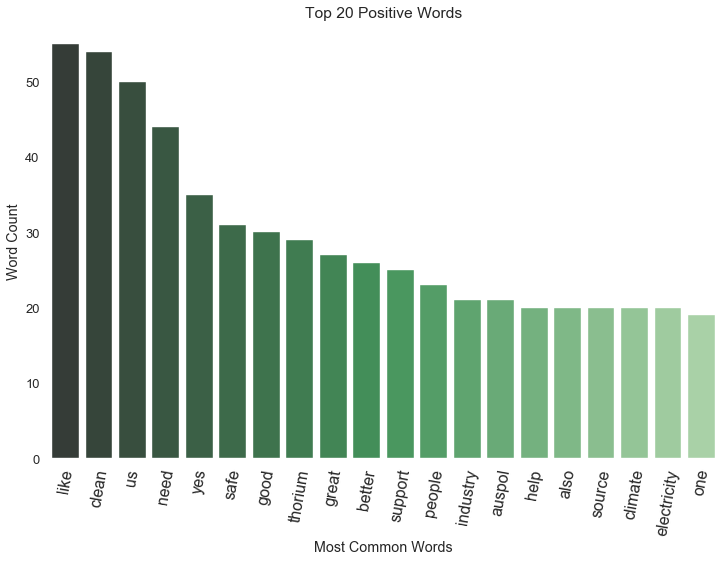

In [254]:
#bar plot for top 20 most common positive words
word_freq_figure1 = plt.figure(figsize=(12,8))
sns.barplot(positive_bar_words, positive_bar_counts,palette='Greens_d')
plt.xticks(fontsize=16)
plt.xticks(rotation=80)
plt.title('Top 20 Positive Words')
plt.xlabel('Most Common Words')
plt.ylabel('Word Count')
sns.set_style()
plt.show()

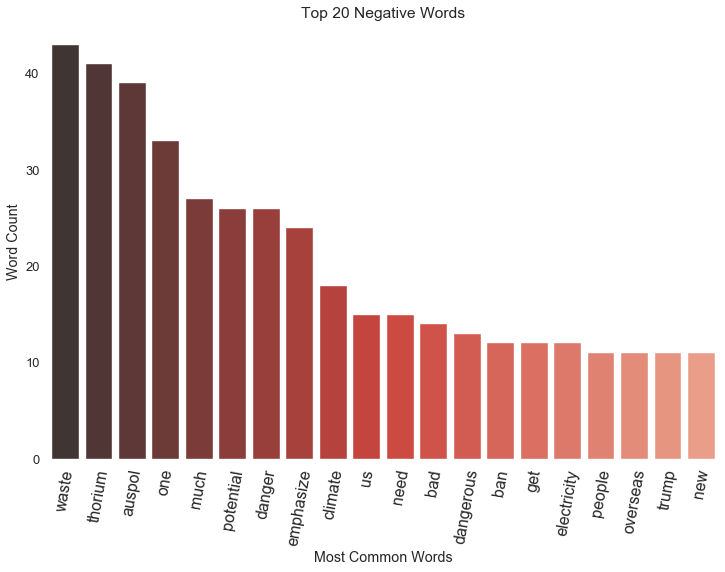

In [282]:
#bar plot for top 20 most common negative words
word_freq_figure1 = plt.figure(figsize=(12,8))
sns.barplot(negative_bar_words, negative_bar_counts,palette='Reds_d')
plt.xticks(fontsize=16)
plt.xticks(rotation=80)
plt.title('Top 20 Negative Words')
plt.xlabel('Most Common Words')
plt.ylabel('Word Count')
sns.set_style()
plt.show()

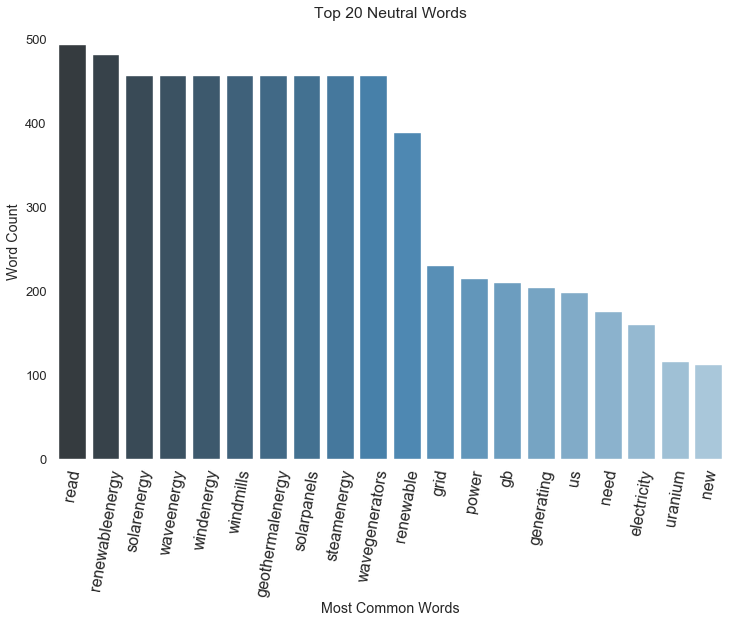

In [284]:
#bar plot for top 20 most common neutral words
word_freq_figure1 = plt.figure(figsize=(12,8))
sns.barplot(neutral_bar_words, neutral_bar_counts,palette='Blues_d')
plt.xticks(fontsize=16)
plt.xticks(rotation=80)
plt.title('Top 20 Neutral Words')
plt.xlabel('Most Common Words')
plt.ylabel('Word Count')
sns.set_style()
plt.show()

In [286]:
# Getting our data into a dictionary
# FORMAT:  dictionary = dict(zip(keys, values))
!pip install wordcloud
from wordcloud import WordCloud
positive_dictionary = dict(zip(positive_bar_words, positive_bar_counts))
negative_dictionary = dict(zip(negative_bar_words, negative_bar_counts))
neutral_dictionary = dict(zip(neutral_bar_words, neutral_bar_counts))

In [287]:
positive_dictionary

{'like': 55,
 'clean': 54,
 'us': 50,
 'need': 44,
 'yes': 35,
 'safe': 31,
 'good': 30,
 'thorium': 29,
 'great': 27,
 'better': 26,
 'support': 25,
 'people': 23,
 'industry': 21,
 'auspol': 21,
 'help': 20,
 'also': 20,
 'source': 20,
 'climate': 20,
 'electricity': 20,
 'one': 19}

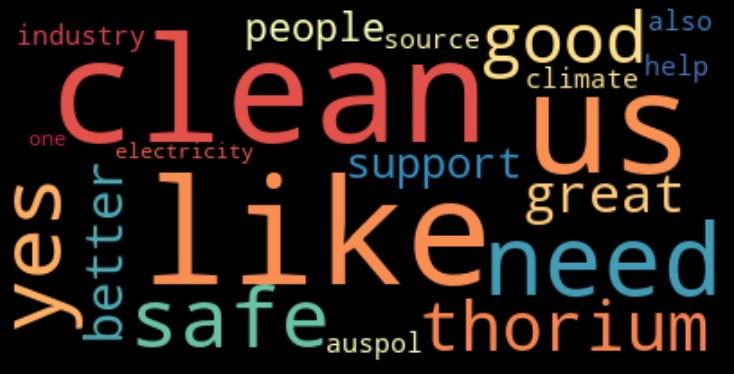

In [288]:
# Create the positive word cloud:

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(positive_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

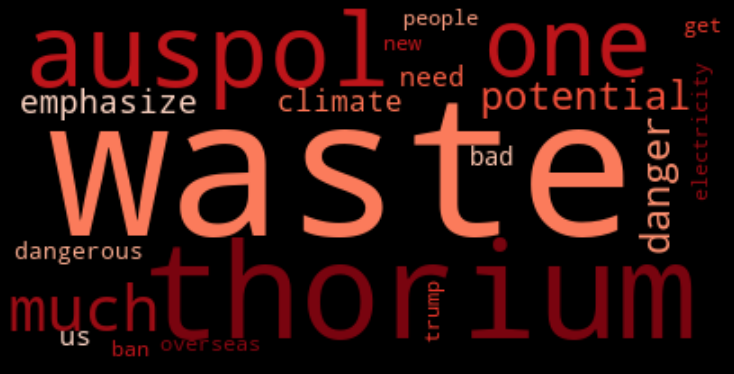

In [312]:
# Create the negative word cloud:

wordcloud = WordCloud(colormap='Reds').generate_from_frequencies(negative_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()

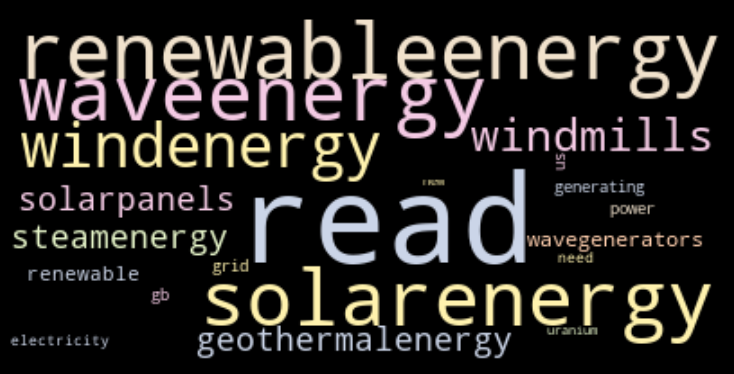

In [307]:
# Create the neutral word cloud:

wordcloud = WordCloud(colormap='Pastel2').generate_from_frequencies(neutral_dictionary)

# Display the generated image w/ matplotlib:

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

plt.show()